## TITANIC SURVIVAL PREDICTION

### INTRODUCTION


### We will use the classic Titanic dataset. The dataconsists of demographic and traveling information for 418 of the Titanic passengers, and the goal isto predict the survival of these passengers.This dataset contains information about general information and detail of each passengers


#### =>Pclass: Passenger class (1 = 1st; 2 = 2nd; 3 = 3rd)
#### =>Survival: A Boolean indicating whether the passenger survived or not (0 = No; 1 = Yes); this is our target
#### =>Name: A field rich in information as it contains title and family names
#### =>Sex: male/female
#### =>Age: Age, asignificant portion of values aremissing
#### =>Sibsp: Number of siblings/spouses aboard
#### =>Parch: Number of parents/children aboard
#### =>Ticket: Ticket number.
#### =>Fare: Passenger fare (British Pound).
#### =>Cabin: Doesthe location of the cabin influence chances of survival?
#### =>Embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

## Ojectives
#### Machine Learning and Data Science  models that can predict survived of titanic passengers.

In [1]:
### 1.Importing Libraries ###

import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [7]:
### 2.Reading Dataset ###
df= pd.read_csv("tested.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [8]:
### 3.Exploratory Data Analysis(EDA) ###
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
##after we are applying head and tail functions..We are got the first and last Five rows...
##IN some Columns there are NULL Values existing
## So we have calculate them First After we have to replace them with 

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [13]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [14]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

In [20]:
#We have to know types of embarked in the columns
Embarked = df['Embarked'].unique()
for Embarkeds in Embarked:
    print("*",Embarkeds)

* Q
* S
* C


In [21]:
Sex = df['Sex'].unique()
for i in Sex:
    print("*",i)

* male
* female


In [22]:
#We have to Replace Embarked and Sex Unique Values with  integer by this we can easily analysis the process
df['Embarked'] = df['Embarked'].map( {'Q': 0,'S':1,'C':2}).astype(int)
df['Sex'] = df['Sex'].map( {'female': 1,'male':0}).astype(int)

In [24]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked         int32
dtype: object

In [25]:
## Here Age and Fare are in FLoat Type we have to change them into Integer
df['Age'] = df['Age'].astype(int)
df['Fare'] = df['Fare'].astype(int)

In [26]:
# Next We have dont want Unwanted columns so we have to drop fromt the dataframe
data = df.drop(['PassengerId','Name','Cabin','Ticket'], axis =1, inplace=True)

In [27]:
df.head(15)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34,0,0,7,0
1,1,3,1,47,1,0,7,1
2,0,2,0,62,0,0,9,0
3,0,3,0,27,0,0,8,1
4,1,3,1,22,1,1,12,1
5,0,3,0,14,0,0,9,1
6,1,3,1,30,0,0,7,0
7,0,2,0,26,1,1,29,1
8,1,3,1,18,0,0,7,2
9,0,3,0,21,2,0,24,1


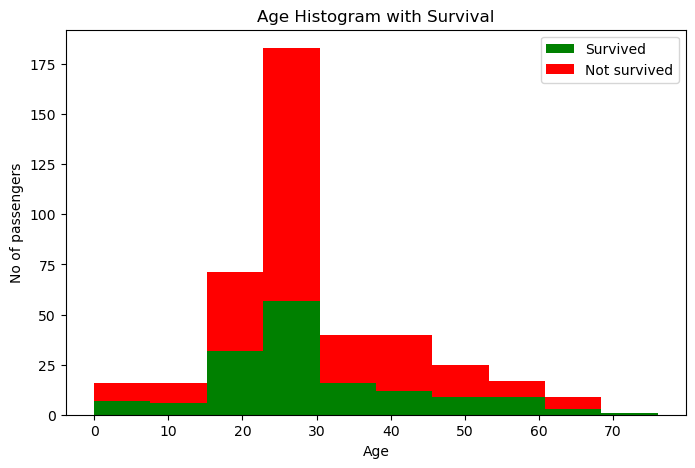

In [30]:
## I think We clean the Unwanted Data and create Wanted dataframe here
## Next We Have to Predict the Surival of Titanic by Visualizing the Data by Using "Age" Column here
## Import Required Libraries
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(8, 5))
plt.hist(x = [df[df['Survived']==1]['Age'], df[df['Survived']==0]['Age']],stacked=True, color = ['b','r'],label = ['Survived','Not survived'])
plt.title('Age Histogram with Survival')
plt.xlabel('Age')
plt.ylabel('No of passengers')
plt.legend()

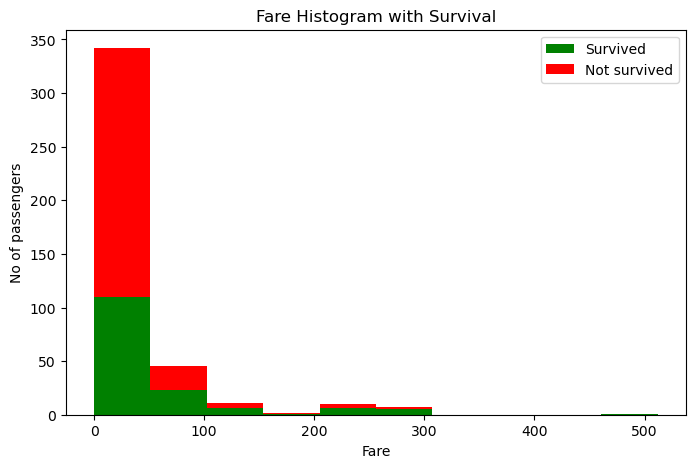

In [39]:
## Next We Have to Predict the Surival of Titanic by Visualizing the Data by Using "Fare" Column here
fig = plt.figure(figsize =(8, 5))
plt.hist(x = [df[df['Survived']==1]['Fare'], df[df['Survived']==0]['Fare']], stacked=True, color = ['g','r'],label = ['Survived','Not survived'])
plt.title('Fare Histogram with Survival')
plt.xlabel('Fare')
plt.ylabel('No of passengers')
plt.legend()

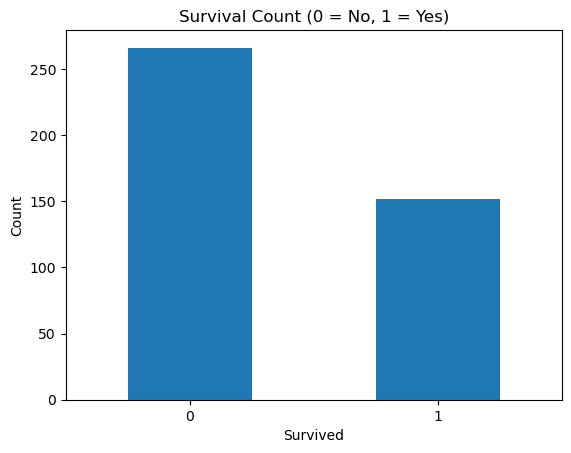

<Figure size 800x500 with 0 Axes>

In [37]:
# Create a bar chart
survival_counts = df['Survived'].value_counts()
survival_counts.plot(kind='bar', rot=0)

# Adding labels and title
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Count (0 = No, 1 = Yes)')
fig = plt.figure(figsize =(8, 5))
# Show the plot
plt.show()

## Spliting Data

In [40]:
Train = df.drop(['Survived'], axis=1)
Test = df.iloc[:,1]
x_train, x_test, y_train, y_test = train_test_split(Train, Test, test_size = 0.2, random_state = 1)

## 5.Model Building

In [41]:
LR = LogisticRegression(solver='liblinear', max_iter=200)
LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)
LRA = accuracy_score(y_pred,y_test)
print('Accuracy: {:.2f}%'.format(LRA*100))

Logistic regression accuracy: 92.86%
